# Project: Patient Attendance Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report describes and search for insights for the people with doctor appointments. We will be cleaning the data first, and then do some exploration about the people that are come as scheduled and the people that doesn't make the appointment.

The first thing to do is that we will going to import all of the library below.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling and Cleaning

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis. We will do it step-by-step to make sure our data can be used properly for exploration.

### General Properties

This section will be the general description with the columns and what do they means.

In [3]:
df = pd.read_csv('noshowappointments-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [45]:
df.shape

(110527, 14)

So we can see that there are 14 columns. I will explain what are the each columns of the data contained.

PatientId = Contains data of the Patient ID, such as [29872499824296]<br>
AppointmentID = Contains the identifier which the appointment is being made, such as [5642903]<br>
Gender = Male or Female<br>
ScheduledDay = The date which the appointment are scheduled. The method of scheduling appointment could be coming to the hospital to register or by phone<br>
AppointmentDay = The date of the appointment day. This is the day where the patients should actually come to the hospital<br>
Age = Self explanatory<br>
Neighbourhood = Where the appointment takes place<br>
Scholarship = Received or not [True or False]<br>
Hipertension = True or False<br>
Diabetes = True or False<br>
Alcoholism = True or False<br>
Handcap = True or False<br>
SMS_received = True or False<br>
No-show = Yes or No<br>
<br>
We can see that the column "No-show" has a dash and it would potentially interrupt our analysis. So I rename the column in to a more safer name.


In [3]:
df.rename(columns={'No-show':'Noshow'}, inplace=True)

In [4]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
Noshow            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing values.

We could see that the day in table 'ScheduledDay' and 'AppointmentDay' is string, so below is the code to change the type to datetime.

In [6]:
# Converting string to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [7]:
# Converting string to datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

Let's look at the unique count of each table.

In [8]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
Noshow                 2
dtype: int64

All of the appointments are unique, shown in the AppointmentID, which is good. We will look further in the Exploratory part.

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Interesting that there is (-1) in the age minimum, so I think that's a bad data. So let's query the age data that is <= 0

In [10]:
ageval1 = df.query('Age <= 0')
ageval1['Age'].count()

3540

Turns out, the data contains too many of the age values <= 0. Let's see how many values are negative.

In [11]:
ageval2 = df.query('Age < 0')
ageval2['Age'].count()

1

Interesting. So there is only 1 value that is negative, which is the (-1). I am guessing that there are still many values stand at (0) is because of the patients are still in womb. The -1 however is bad data. Let's take a look at the row.

In [12]:
ageval2

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


I see that all of the data in other columns are good. So I think I will just change the age to 0, just to get rid of the negative value.

In [13]:
df.Age.replace(-1, 0, inplace=True)

If we see the described data, we also see that max value of 'Handcap' is 4. That shouldn't be happening. So I try to query the which data that has the value of > 1.

In [7]:
hcval = df.query('Handcap > 1')
hcval.count()

PatientId         199
AppointmentID     199
Gender            199
ScheduledDay      199
AppointmentDay    199
Age               199
Neighbourhood     199
Scholarship       199
Hipertension      199
Diabetes          199
Alcoholism        199
Handcap           199
SMS_received      199
No-show           199
dtype: int64

Turns out, there are so many data, counting at 199, that has bad value other than 1 and 0. I am assuming that the data is valued at 1 or True, so I will replace all of the data above to 1.

In [8]:
df.Handcap.replace(2, 1, inplace=True)

In [9]:
df.Handcap.replace(3, 1, inplace=True)

In [10]:
df.Handcap.replace(4, 1, inplace=True)

In [14]:
sum(df.duplicated())

0

No duplicate row here.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1
#### Any correlation between the age and hipertension? Does the people with hipertension, linked with age, more likely to come?

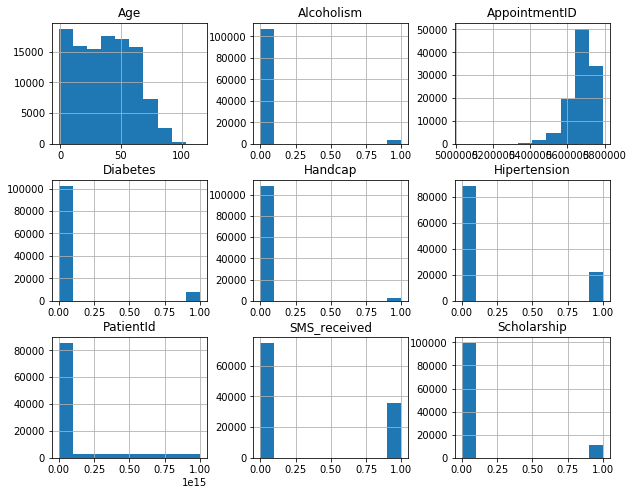

In [11]:
df.hist(figsize=(10, 8));

Let's interpret some of these histogram.<br>
1. The top patients in the data are in the age of 0 and 50. It is not too skewed and not a normal distribution either.<br>
2. There are not too many of patients with alcoholism and handcap. There are some patients, although not even half, are diagnosed with diabetes, with the most being hipertension.<br>
3. The number of patients that received sms are half than those who don't received sms.<br>
4. Only a few patients that received scholarhsip.<br>
<br>
To answer the question, let's separate query patients where hipertension == 1 and hipertension == 0

In [33]:
Yes_Hipertension = df.query('Hipertension == 1')
Yes_Hipertension

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
25,5.819370e+12,5624020,M,2016-04-26 15:04:17,2016-04-29,46,CONQUISTA,0,1,0,0,0,1,No
26,2.578785e+10,5641781,F,2016-04-29 14:19:42,2016-04-29,45,BENTO FERREIRA,0,1,0,0,0,0,No
32,5.288356e+13,5637908,M,2016-04-29 07:30:27,2016-04-29,61,SÃO CRISTÓVÃO,0,1,0,0,0,0,No
34,1.999976e+13,5637963,F,2016-04-29 07:34:30,2016-04-29,79,SÃO CRISTÓVÃO,0,1,0,0,0,0,No
36,7.298459e+13,5637975,F,2016-04-29 07:35:19,2016-04-29,63,SÃO CRISTÓVÃO,0,1,1,0,0,0,No
37,1.578132e+12,5637986,F,2016-04-29 07:35:56,2016-04-29,64,TABUAZEIRO,1,1,1,0,0,0,No
38,5.873316e+12,5609446,M,2016-04-20 15:54:18,2016-04-29,85,SÃO CRISTÓVÃO,0,1,0,0,0,1,No


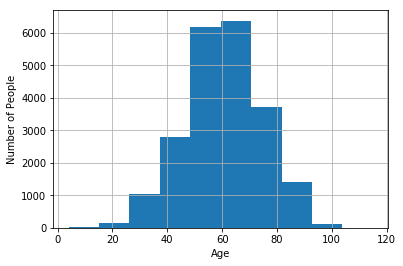

In [49]:
Yes_Hipertension.Age.hist()
plt.xlabel("Age")
plt.ylabel("Number of People");

As expected, people with age around 45 - 70 are more likely to have hipertension compared to other age. And looks like we've got a normal distribution here.

In [36]:
No_Hipertension = df.query('Hipertension == 0')
No_Hipertension

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No
10,7.345362e+14,5630213,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,No
11,7.542951e+12,5620163,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
12,5.666548e+14,5634718,F,2016-04-28 11:33:51,2016-04-29,22,NOVA PALESTINA,1,0,0,0,0,0,No


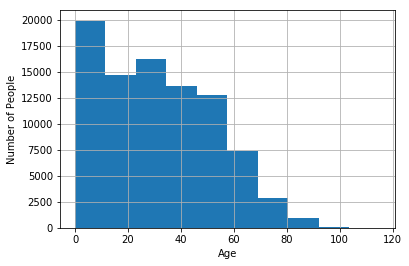

In [50]:
No_Hipertension.Age.hist()
plt.xlabel("Age")
plt.ylabel("Number of People");

This is inline with our data with patients that have hipertension, which counts more in the younger age for no hipertension.

In [38]:
Show = df.query('Noshow == "Yes"')
Show.Noshow.count()

22319

In [39]:
NoShow = df.query('Noshow == "No"')
NoShow.Noshow.count()

88208

Interesting that people are less likely to come overall in the data. There got to be something here, but let's stick to the question. Does people with hipertension more likely to come?

In [40]:
Hip_Come = df[(df.Hipertension == 1) & (df.Noshow == "Yes")]
Hip_Come

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
44,2.741649e+11,5635414,F,2016-04-28 13:27:27,2016-04-29,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes
212,4.266984e+14,5642059,M,2016-04-29 14:59:38,2016-04-29,62,SANTOS DUMONT,0,1,1,0,0,0,Yes
270,8.617228e+12,5620528,F,2016-04-26 09:08:53,2016-04-29,45,CARATOÍRA,1,1,0,0,0,1,Yes
272,5.119616e+12,5594085,F,2016-04-18 10:12:57,2016-04-29,51,NOVA PALESTINA,0,1,0,0,1,1,Yes
352,5.917359e+12,5494413,F,2016-03-21 10:01:59,2016-04-29,62,SÃO CRISTÓVÃO,0,1,0,0,0,1,Yes
441,3.935966e+13,5639484,M,2016-04-29 09:09:31,2016-04-29,36,SÃO BENEDITO,0,1,0,0,0,0,Yes
463,5.228864e+08,5633872,F,2016-04-28 09:58:32,2016-04-29,66,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes
537,3.546481e+13,5590085,M,2016-04-15 13:33:58,2016-04-29,58,ITARARÉ,0,1,0,0,0,1,Yes
619,4.272659e+13,5634178,F,2016-04-28 10:30:27,2016-04-29,67,PRAIA DO CANTO,0,1,1,0,0,0,Yes
684,8.238132e+13,5629179,F,2016-04-27 12:56:16,2016-04-29,73,JOANA D´ARC,0,1,0,0,0,0,Yes


In [41]:
Hip_NoCome = df[(df.Hipertension == 0) & (df.Noshow == "No")]
Hip_NoCome

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No
10,7.345362e+14,5630213,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,No
12,5.666548e+14,5634718,F,2016-04-28 11:33:51,2016-04-29,22,NOVA PALESTINA,1,0,0,0,0,0,No
13,9.113946e+14,5636249,M,2016-04-28 14:52:07,2016-04-29,28,NOVA PALESTINA,0,0,0,0,0,0,No
14,9.988472e+13,5633951,F,2016-04-28 10:06:24,2016-04-29,54,NOVA PALESTINA,0,0,0,0,0,0,No
15,9.994839e+10,5620206,F,2016-04-26 08:47:27,2016-04-29,15,NOVA PALESTINA,0,0,0,0,0,1,No


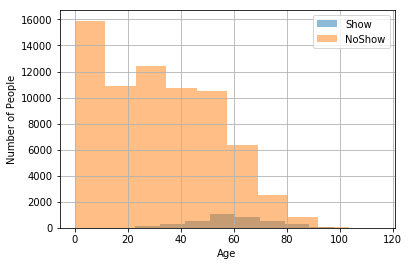

In [51]:
Hip_Come.Age.hist(alpha=0.5, label='Show')
Hip_NoCome.Age.hist(alpha=0.5, label='NoShow')
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.legend();

In [43]:
df.Noshow.value_counts()

No     88208
Yes    22319
Name: Noshow, dtype: int64

Turns out, there is no direct correlation when comparing people with hipertension and people with no hipertension, linked with age.

### Research Question 2
#### I want to know does the people that received sms are more likely to come to the Hospital.

In [28]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [45]:
SMSd = df.SMS_received == 1
noSMS = df.SMS_received == 0

In [46]:
df.Age[SMSd].mean()

37.513809819063184

In [47]:
df.Age[noSMS].mean()

36.88797388233726

It seems like there is not much difference between the one that received SMS and not received by age.

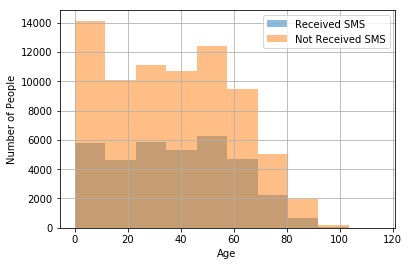

In [52]:
df.Age[SMSd].hist(alpha=0.5, label="Received SMS")
df.Age[noSMS].hist(alpha=0.5, label="Not Received SMS")
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.legend();

From this histogram, we can see that every patient has the same chance to receive sms

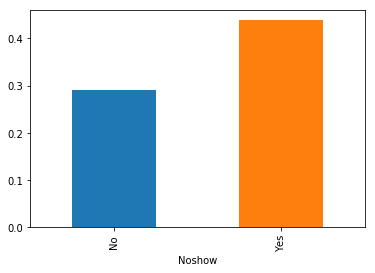

In [40]:
df.groupby('Noshow').SMS_received.mean().plot(kind='bar');

In [37]:
df.Noshow.value_counts()

No     88208
Yes    22319
Name: Noshow, dtype: int64

Although most patients are not showing to the hospital, we can see from the histogram that most of the people that received sms will more likely to come to the Hospital than those who don't.

<a id='conclusions'></a>
## Conclusions

There are two main conclusions that I could take from this analysis:<br>
1. Most patients are not showing to the hospital (around 4 out of 5 people are not coming) and there are no correlation when performing analysis of showing/not showing to patients with hipertension, linked to age.<br>
2. Patients who received an sms about the schedule will more likely to show to the hospital than those who don't received the sms.<br>
<br>
Thank you! :)